In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log = pd.read_csv('logfile_boliga.csv', sep=';')#, error_bad_lines=False
#This file contains logs of a boliga testrun, the total scrape and DAWA results
hvorlang_log = pd.read_csv('Hvorlangterder_total_log.csv', sep=';')
hvorlangdf = pd.read_csv('howlongdf2.csv')
temp = pd.read_csv('howlongdf.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
hvorlang_log['t'] = hvorlang_log['t'].astype(str)

In [7]:
def convert_str_time(stringtime):
    stringtime = stringtime.replace('.','')
    stringtime = stringtime[0:13]
    return pd.to_datetime(stringtime, unit='ms')
def convert_str_time2(stringtime):
    stringtime = stringtime.replace('.','')
    stringtime = stringtime[0:10]
    return pd.to_datetime(stringtime, unit='s')

In [8]:
log['time'] = log['t'].apply(convert_str_time)
hvorlang_log['time'] = hvorlang_log['t'].apply(convert_str_time2)
#LOG OUTPUTS BAD DATA!

In [10]:
pd.options.display.max_rows = 500

In [11]:
dawa_log = log.iloc[2247:].copy()

In [12]:
boliga_log = log.iloc[929:2247].copy()

In [13]:
print(dawa_log.shape)
print(boliga_log.shape)
print(hvorlang_log.shape)

(98, 12)
(1318, 12)
(65639, 12)


In [14]:
pd.options.display.max_info_rows = 500

In [15]:
boliga_log['delta_t2'] = -boliga_log['time'].diff()
dawa_log['delta_t2'] = -dawa_log['time'].diff()
hvorlang_log['delta_t2'] = -hvorlang_log['time'].diff()

In [17]:
dawa_log['delta_t'] = dawa_log['delta_t'].astype(float)
#boliga_log['delta_t'] = boliga_log['delta_t'].astype(float)

# Plot the Number of Errors codes over time - to see if there are any systematics in missing answers

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


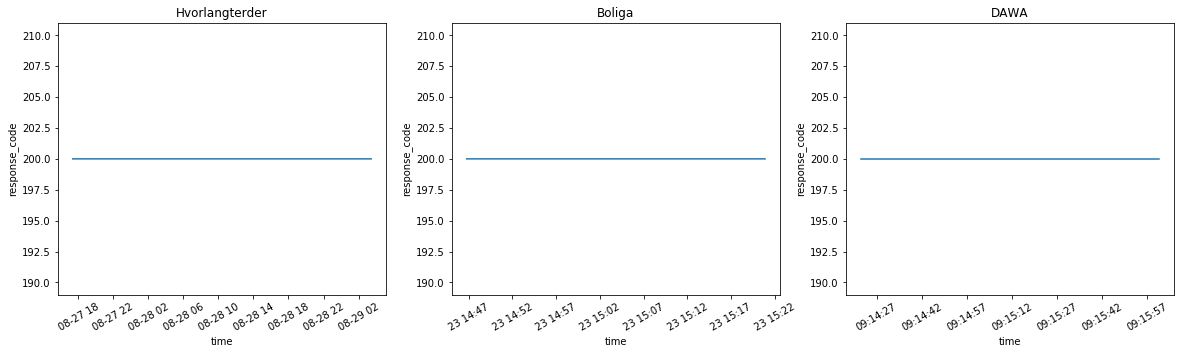

In [77]:
f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.lineplot(x="time", y='response_code', data=hvorlang_log, ax = axes[0]).set_title('Hvorlangterder')
a = sns.lineplot(x="time", y='response_code', data=boliga_log,  ax = axes[1]).set_title('Boliga')
b = sns.lineplot(x="time", y='response_code', data=dawa_log, ax = axes[2]).set_title('DAWA')
for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)
plt.savefig('1_logs_responsecode_time.png')

In [119]:
boliga_log['error2'] = pd.notnull(boliga_log['error'])
boliga_log['error2'] = boliga_log['error2'].astype(int)
hvorlang_log['error2'] = pd.notnull(hvorlang_log['error'])
hvorlang_log['error2'] = hvorlang_log['error2'].astype(int)
dawa_log['error2'] = pd.notnull(dawa_log['error'] == False)
dawa_log['error2'] = dawa_log['error2'].astype(int)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


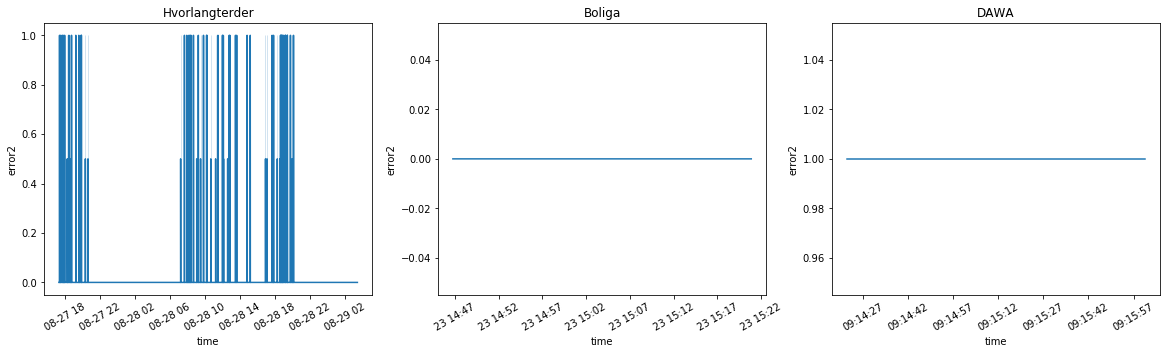

In [121]:
d, axes1 = plt.subplots(1, 3, figsize=(20,5))
sns.lineplot(x="time", y='error2', data=hvorlang_log, ax = axes1[0]).set_title('Hvorlangterder')
sns.lineplot(x="time", y='error2', data=boliga_log,  ax = axes1[1]).set_title('Boliga')
sns.lineplot(x="time", y='error2', data=dawa_log, ax = axes1[2]).set_title('DAWA')
for ax in d.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)
#plt.savefig('1_logs_responsecode_time.png')

In [122]:
hvorlang_log.groupby('error2').count()

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error,time,delta_t2
error2,,,,,,,,,,,,,
0,65559,65559,65559,65559,65559,65559,65559,65559,65559,65559,0,65559,65559
1,80,80,80,80,80,80,0,80,0,80,80,80,80


In [123]:
hvorlang_log.groupby('error').count()

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,time,delta_t2,error2
error,,,,,,,,,,,,,
"('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))",80,80,80,80,80,80,0,80,0,80,80,80,80


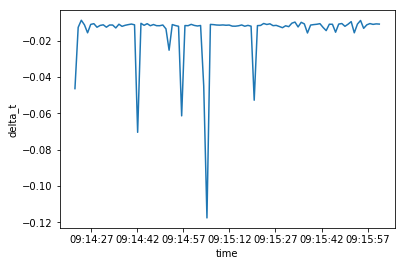

In [26]:
ax = sns.lineplot(x="time", y='delta_t', data=dawa_log)

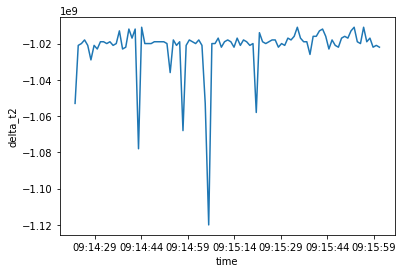

In [27]:
ax = sns.lineplot(x="time", y='delta_t2', data=dawa_log[1:])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


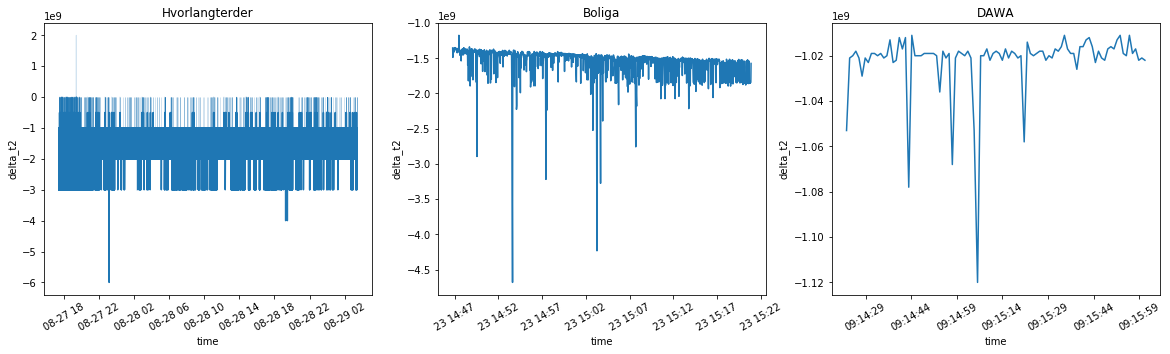

In [125]:
e, axes2 = plt.subplots(1, 3, figsize=(20,5))
sns.lineplot(x="time", y='delta_t2', data=hvorlang_log[1:], ax = axes2[0]).set_title('Hvorlangterder')
sns.lineplot(x="time", y='delta_t2', data=boliga_log[1:],  ax = axes2[1]).set_title('Boliga')
sns.lineplot(x="time", y='delta_t2', data=dawa_log[1:], ax = axes2[2]).set_title('DAWA')
for ax in e.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)

In [144]:
hvorlang_log.sort_values('delta_t2',ascending = False)

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error,time,delta_t2,error2
3969,3969,Coordinates_datascience,requests,1566933726.3521366,-1.544696,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,11532,200.0,True,NaN,2019-08-27 19:22:06,2000000000,0
47964,47964,Coordinates_datascience,requests,1567016779.706957,-1.359506,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,25989,200.0,True,NaN,2019-08-28 18:26:19,0,0
2589,2589,Coordinates_datascience,requests,1566931186.8675818,-0.039890,https://hvorlangterder.poi.viamap.net/v1/neare...,NaN,0,NaN,False,"('Connection aborted.', RemoteDisconnected('Re...",2019-08-27 18:39:46,0,1
2677,2677,Coordinates_datascience,requests,1566931347.5913038,-1.610447,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,8153,200.0,True,NaN,2019-08-27 18:42:27,0,0
2663,2663,Coordinates_datascience,requests,1566931319.6395118,-1.605763,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,7681,200.0,True,NaN,2019-08-27 18:41:59,0,0
2660,2660,Coordinates_datascience,requests,1566931314.969463,-1.566164,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,7748,200.0,True,NaN,2019-08-27 18:41:54,0,0
52911,52911,Coordinates_datascience,requests,1567026068.9026759,-1.297673,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,25470,200.0,True,NaN,2019-08-28 21:01:08,0,0
52908,52908,Coordinates_datascience,requests,1567026064.6007922,-1.294593,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,26471,200.0,True,NaN,2019-08-28 21:01:04,0,0
2634,2634,Coordinates_datascience,requests,1566931264.658772,-1.598110,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,6845,200.0,True,NaN,2019-08-27 18:41:04,0,0
14435,14435,Coordinates_datascience,requests,1566953761.831133,-1.478806,https://hvorlangterder.poi.viamap.net/v1/neare...,https://hvorlangterder.poi.viamap.net/v1/neare...,23651,200.0,True,NaN,2019-08-28 00:56:01,0,0


# Plot size distribution (length of html/json response) - i.e. histogram /sns.distplot-, to look for potential artifacts and errors (unexpected small responses, standard responses with the exact same length).

(0, 600)

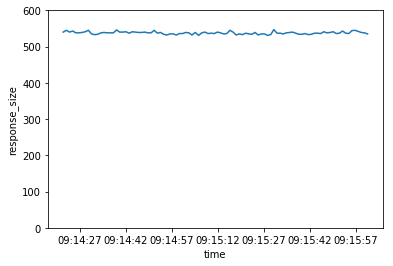

In [33]:
ax = sns.lineplot(x="time", y='response_size', data=dawa_log)
ax.set_ylim(0,600)

(0, 100000)

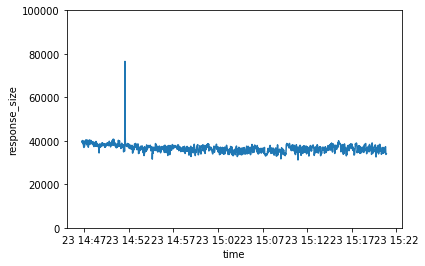

In [34]:
ax = sns.lineplot(x="time", y='response_size', data=boliga_log)
ax.set_ylim(0,100000)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


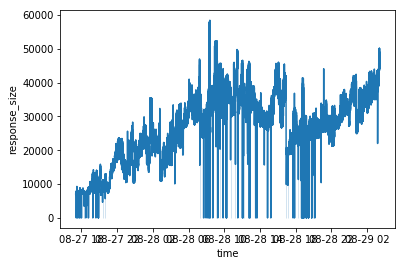

In [35]:
ax = sns.lineplot(x="time", y='response_size', data=hvorlang_log)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


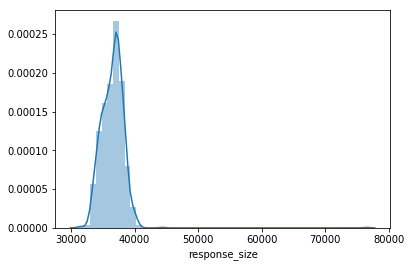

In [36]:
ax = sns.distplot(boliga_log['response_size']);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


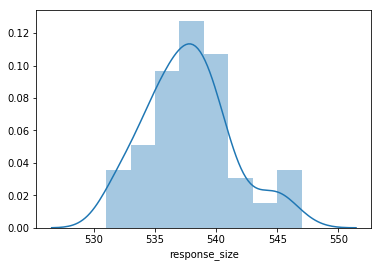

In [37]:
ax = sns.distplot(dawa_log['response_size']);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


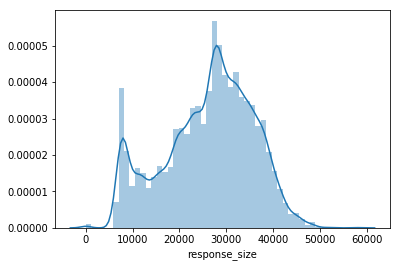

In [38]:
ax = sns.distplot(hvorlang_log['response_size']);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


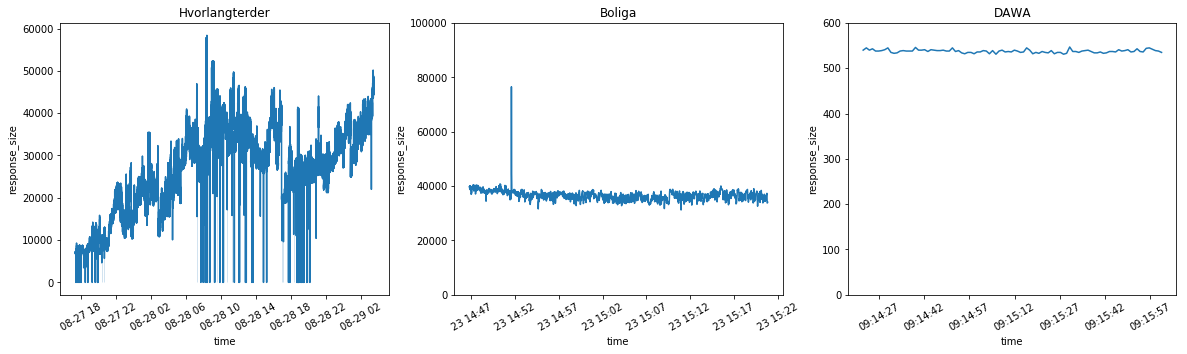

In [147]:
w, axes3 = plt.subplots(1,3,figsize=(20,5))
sns.lineplot(x="time", y='response_size', data=hvorlang_log, ax = axes3[0]).set_title('Hvorlangterder')
sns.lineplot(x="time", y='response_size', data=boliga_log,  ax = axes3[1]).set_title('Boliga')
sns.lineplot(x="time", y='response_size', data=dawa_log, ax = axes3[2]).set_title('DAWA')
axes3[2].set_ylim(0,600)
axes3[1].set_ylim(0,100000)
#sns.distplot(boliga_log['response_size'], ax = axes3[4]).set_title('Hvorlangterder')
#sns.distplot(dawa_log['response_size'], ax = axes3[5]).set_title('Boliga')
#sns.distplot(hvorlang_log['response_size'], ax = axes3[3]).set_title('DAWA')
for ax in w.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'DAWA')

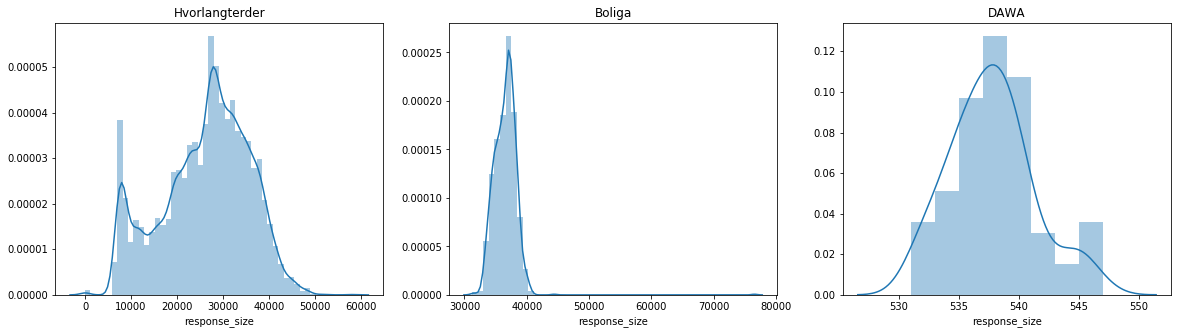

In [143]:
w, axes3 = plt.subplots(1,3,figsize=(20,5))
#sns.lineplot(x="time", y='response_size', data=hvorlang_log, ax = axes3[0]).set_title('Hvorlangterder')
#sns.lineplot(x="time", y='response_size', data=boliga_log,  ax = axes3[1]).set_title('Boliga')
#sns.lineplot(x="time", y='response_size', data=dawa_log, ax = axes3[2]).set_title('DAWA')
sns.distplot(hvorlang_log['response_size'], ax = axes3[0]).set_title('Hvorlangterder')
sns.distplot(boliga_log['response_size'], ax = axes3[1]).set_title('Boliga')
sns.distplot(dawa_log['response_size'], ax = axes3[2]).set_title('DAWA')
#for ax in w.axes:
#    plt.sca(ax)
#    plt.xticks(rotation=30)

In [39]:
boliga_log.head()

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error,time,delta_t2,delta_vs_size
929,11,Boligdata,requests,1.566.571.605.972.710,-0.11806797981262207,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,39755,200.0,True,NaN,2019-08-23 14:46:45.972,-9223372036854775808,-2.320053e+14
930,12,Boligdata,requests,15.665.716.073.297.800,-0.25193023681640625,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,39473,200.0,True,NaN,2019-08-23 14:46:47.329,-1357000000,-3.437793e+04
931,13,Boligdata,requests,15.665.716.088.167.200,-0.12536907196044922,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,39121,200.0,True,NaN,2019-08-23 14:46:48.816,-1487000000,-3.801028e+04
932,14,Boligdata,requests,1.566.571.610.171.850,-0.18535208702087402,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40142,200.0,True,NaN,2019-08-23 14:46:50.171,-1355000000,-3.375517e+04
933,15,Boligdata,requests,15.665.716.115.908.700,-0.1501760482788086,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,38680,200.0,True,NaN,2019-08-23 14:46:51.590,-1419000000,-3.668563e+04


In [40]:
def get_page(url):
    url = url.split('https://api.boliga.dk/api/v2/search/results?pageSize=50&sort=zipCode-a&page=')
    return url[-1]

In [41]:
boliga_log['page'] = boliga_log['url'].apply(get_page)

In [42]:
boliga_log.sort_values('response_size', ascending=False)

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error,time,delta_t2,delta_vs_size,page
1129,211,Boligdata,requests,1.566.571.894.950.850,-0.1420440673828125,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,76526,200.0,True,NaN,2019-08-23 14:51:34.950,-1414000000,-1.847738e+04,202
1130,212,Boligdata,requests,1.566.571.896.477.370,-0.16022801399230957,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,44404,200.0,True,NaN,2019-08-23 14:51:36.477,-1527000000,-3.438879e+04,203
1075,157,Boligdata,requests,1.566.571.815.643.520,-0.1629941463470459,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40747,200.0,True,NaN,2019-08-23 14:50:15.643,-1420000000,-3.484919e+04,148
1078,160,Boligdata,requests,1.566.571.819.996.380,-0.14974308013916016,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40664,200.0,True,NaN,2019-08-23 14:50:19.996,-1398000000,-3.437930e+04,151
949,31,Boligdata,requests,1.566.571.633.518.060,-0.14583301544189453,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40502,200.0,True,NaN,2019-08-23 14:47:13.518,-1371000000,-3.385018e+04,22
966,48,Boligdata,requests,15.665.716.569.802.800,-0.20147299766540527,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40419,200.0,True,NaN,2019-08-23 14:47:36.980,-1457000000,-3.604740e+04,39
957,39,Boligdata,requests,1.566.571.644.660.760,-0.12925410270690918,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40350,200.0,True,NaN,2019-08-23 14:47:24.660,-1382000000,-3.425031e+04,30
1099,181,Boligdata,requests,15.665.718.510.544.100,-0.21199631690979004,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40244,200.0,True,NaN,2019-08-23 14:50:51.054,-1419000000,-3.525991e+04,172
972,54,Boligdata,requests,15.665.716.656.192.400,-0.15231084823608398,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40200,200.0,True,NaN,2019-08-23 14:47:45.619,-1537000000,-3.823383e+04,45
1071,153,Boligdata,requests,15.665.718.096.756.000,-0.1665956974029541,https://api.boliga.dk/api/v2/search/results?pa...,https://api.boliga.dk/api/v2/search/results?pa...,40150,200.0,True,NaN,2019-08-23 14:50:09.675,-1438000000,-3.581569e+04,144


In [43]:
def get_page2(url2):
    url2 = url2.split('https://dawa.aws.dk/kommuner/')
    return url2[-1]


In [44]:
dawa_log['page'] = dawa_log['url'].apply(get_page2)

In [45]:
dawa_log.sort_values('response_size', ascending=False)

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error,time,delta_t2,delta_vs_size,page
2314,69,Kommunedata,requests,15.666.381.303.078.500,-0.011895,https://dawa.aws.dk/kommuner/760,https://dawa.aws.dk/kommuner/760,547,200.0,True,NaN,2019-08-24 09:15:30.307,-1021000000,-1.866545e+06,760
2264,19,Kommunedata,requests,156.663.807.906.777,-0.011263,https://dawa.aws.dk/kommuner/173,https://dawa.aws.dk/kommuner/173,546,200.0,True,NaN,2019-08-24 09:14:39.067,-1022000000,-1.871795e+06,173
2340,95,Kommunedata,requests,1.566.638.156.750.570,-0.011396,https://dawa.aws.dk/kommuner/813,https://dawa.aws.dk/kommuner/813,545,200.0,True,NaN,2019-08-24 09:15:56.750,-1019000000,-1.869725e+06,813
2248,3,Kommunedata,requests,1.566.638.062.738.480,-0.012771,https://dawa.aws.dk/kommuner/147,https://dawa.aws.dk/kommuner/147,545,200.0,True,NaN,2019-08-24 09:14:22.738,-1053000000,-1.932110e+06,147
2255,10,Kommunedata,requests,1.566.638.069.891.110,-0.011708,https://dawa.aws.dk/kommuner/169,https://dawa.aws.dk/kommuner/169,545,200.0,True,NaN,2019-08-24 09:14:29.891,-1023000000,-1.877064e+06,169
2276,31,Kommunedata,requests,1.566.638.091.333.940,-0.013600,https://dawa.aws.dk/kommuner/250,https://dawa.aws.dk/kommuner/250,545,200.0,True,NaN,2019-08-24 09:14:51.333,-1019000000,-1.869725e+06,250
2300,55,Kommunedata,requests,15.666.381.160.005.400,-0.011455,https://dawa.aws.dk/kommuner/430,https://dawa.aws.dk/kommuner/430,545,200.0,True,NaN,2019-08-24 09:15:16.000,-1021000000,-1.873394e+06,430
2339,94,Kommunedata,requests,1.566.638.155.731.540,-0.013308,https://dawa.aws.dk/kommuner/820,https://dawa.aws.dk/kommuner/820,544,200.0,True,NaN,2019-08-24 09:15:55.731,-1011000000,-1.858456e+06,820
2250,5,Kommunedata,requests,15.666.380.647.790.900,-0.011391,https://dawa.aws.dk/kommuner/165,https://dawa.aws.dk/kommuner/165,543,200.0,True,NaN,2019-08-24 09:14:24.779,-1020000000,-1.878453e+06,165
2336,91,Kommunedata,requests,156.663.815.268.167,-0.015764,https://dawa.aws.dk/kommuner/846,https://dawa.aws.dk/kommuner/846,543,200.0,True,NaN,2019-08-24 09:15:52.681,-1011000000,-1.861878e+06,846


In [46]:
202 * 50

10100

In [47]:
10100 + 50

10150

In [48]:
df = pd.read_csv('Boliga Scraped - Rådata.csv')
pd.options.display.max_columns = 100
df.iloc[10050:10150]

,agentDisplayName,agentRegId,area,basementSize,buildYear,city,createdDate,daysForSale,domainId,energyClass,exp,floor,groupKey,guid,id,images,inWatchlist,isActive,isForeclosure,isPremiumAgent,latitude,longitude,lotSize,municipality,net,openHouse,price,priceChangePercentTotal,propertyType,rooms,selfsale,size,squaremeterPrice,street,views,zipCode,coordinate
10050,NaN,24638,3,0,1971,Hundested,2019-08-23T03:10:00.753Z,0,3,-,1584,NaN,NaN,CE044C85-F25E-42D4-B0EB-E078EB1803AD,1588494,NaN,False,True,False,False,55.99420,11.92999,1604,260,0,2019-08-25T13:30:00.000Z,1195000,0,4,3.0,False,50,23900.0,Multebærvænget 10,0,3390,"55.9942, 11.92999"
10051,NaN,272,3,0,1900,Hundested,2019-06-14T03:27:01.797Z,70,7,F,1918,NaN,NaN,79F2DFBF-2CCC-4F17-9074-5E624D663251,1567297,NaN,False,True,False,False,55.95933,11.90991,3509,260,0,2019-08-24T11:00:00.000Z,1295000,0,1,4.0,False,107,12102.0,"Amtsvejen 247, Amagerhuse",11,3390,"55.95933, 11.90991"
10052,NaN,24638,3,84,1953,Hundested,2019-05-23T03:08:48.120Z,92,3,F,2735,NaN,NaN,C4D3BF60-B3CE-46E3-9138-05B3AC3A7FBD,1559775,NaN,False,True,False,False,55.96965,11.85634,1205,260,0,NaN,1395000,0,1,4.0,False,84,16607.0,Havlitvej 12,17,3390,"55.96965, 11.85634"
10053,NaN,272,3,53,1953,Hundested,2019-06-06T03:52:04.367Z,78,7,F,2754,NaN,NaN,18C0374C-66BE-4E4A-8480-E336692F1E8C,1564460,NaN,False,True,False,False,55.96274,11.86184,1380,260,0,2019-08-24T11:00:00.000Z,1395000,0,1,4.0,False,135,10333.0,Amtsvejen 77,10,3390,"55.962740000000004, 11.861839999999999"
10054,NaN,24638,3,0,1991,Hundested,2019-01-24T03:51:54.957Z,211,3,D,1818,NaN,NaN,20ECBADA-EC89-418E-AAAF-38E3F5FFBDEC,1517285,NaN,False,True,False,False,55.96835,11.86253,942,260,0,NaN,1495000,0,2,5.0,False,114,13114.0,Ll Karlsmindevej 51B,12,3390,"55.96835, 11.86253"
10055,NaN,272,3,0,2004,Hundested,2019-02-28T04:02:22.183Z,176,7,C,3937,NaN,NaN,C367D5DA-E0CC-4AF0-A9D8-1FFCE942A84C,1527795,"[{'id': 1394916, 'date': '2019-02-20T23:00:00....",False,True,False,False,55.98577,11.94686,247,260,0,2019-08-24T11:00:00.000Z,1495000,-17,1,2.0,False,196,7627.0,"Nordstjernen 16, Økosamfundet Dyssekilde",41,3390,"55.985769999999995, 11.946860000000001"
10056,NaN,272,3,0,1971,Hundested,2019-08-21T03:35:45.257Z,2,7,D,2280,NaN,NaN,0E053989-BA06-4817-B0AC-405025BBF038,1587681,NaN,False,True,False,False,55.95129,11.86670,797,260,0,2019-08-24T11:00:00.000Z,1495000,0,1,4.0,False,117,12777.0,Skovmarken 3,42,3390,"55.95129, 11.8667"
10057,NaN,272,3,96,1976,Hundested,2018-10-15T03:58:49.717Z,312,7,D,2813,NaN,NaN,DB645C69-6BF3-4ABE-9209-B81A9C9ED27A,1492481,NaN,False,True,False,False,55.94965,11.87494,803,260,0,2019-08-24T11:00:00.000Z,1595000,-11,1,6.0,False,157,10159.0,Levkøjvej 7,6,3390,"55.94965, 11.874939999999999"
10058,NaN,212,3,0,1973,Hundested,2018-10-28T03:10:03.867Z,299,7,-,2049,NaN,NaN,32FA7B33-8BAE-494A-8EF7-629FFFD88BA0,1496650,"[{'id': 1414785, 'date': '2018-07-29T22:00:00....",False,True,False,False,55.99413,11.92470,1876,260,0,NaN,1595000,-6,4,5.0,False,98,16275.0,Abildgården 15,22,3390,"55.994130000000006, 11.9247"
10059,NaN,272,3,0,1973,Hundested,2019-06-05T03:52:56.277Z,79,7,C,3047,NaN,NaN,02ED93F7-31F2-4977-9BF0-6C775E48A341,1564241,NaN,False,True,False,False,55.94894,11.87138,891,260,0,2019-08-24T11:00:00.000Z,1595000,-9,1,4.0,False,185,8621.0,Erantisvænget 1,6,3390,"55.94894, 11.87138"


In [49]:
def return_dict_len(dict_):
    return len(str(dict_))


In [50]:
df['dict_len_images'] = df['images'].apply(return_dict_len)

In [51]:
df.sort_values('dict_len_images', ascending=False)

,agentDisplayName,agentRegId,area,basementSize,buildYear,city,createdDate,daysForSale,domainId,energyClass,exp,floor,groupKey,guid,id,images,inWatchlist,isActive,isForeclosure,isPremiumAgent,latitude,longitude,lotSize,municipality,net,openHouse,price,priceChangePercentTotal,propertyType,rooms,selfsale,size,squaremeterPrice,street,views,zipCode,coordinate,dict_len_images
10118,NaN,93,3,0,2017,Hillerød,2019-07-20T03:26:40.213Z,34,9,-,519,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1578804,"[{'id': 1578804, 'date': '2019-08-23T14:51:37....",False,True,False,False,55.92804,12.27342,459,219,0,NaN,1300000,0,4,4.0,False,40,32500.0,Tirsdagsengen 1 Parcel nr. 48,5,3400,"55.92804, 12.27342",4127
10084,NaN,93,3,0,0,Hillerød,2016-04-20T03:36:32.590Z,1220,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1204110,"[{'id': 1204110, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,354,219,0,NaN,320000,31,8,0.0,False,0,0.0,Tirsdagsengen 1 Parcel nr. 19,3,3400,"55.92804, 12.27342",4127
10085,NaN,93,3,0,0,Hillerød,2019-01-23T03:45:14.843Z,212,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1516958,"[{'id': 1516958, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,355,219,0,NaN,320000,0,8,0.0,False,0,0.0,Tirsdagsengen 1 Parc.8,9,3400,"55.92804, 12.27342",4127
10086,NaN,93,3,0,0,Hillerød,2016-04-21T03:34:55.927Z,1219,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1204579,"[{'id': 1204579, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,375,219,0,NaN,350000,27,8,0.0,False,0,0.0,Tirsdagsengen 1 Parcel nr. 37,5,3400,"55.92804, 12.27342",4127
10087,NaN,93,3,0,0,Hillerød,2016-04-21T03:34:55.947Z,1219,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1204580,"[{'id': 1204580, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,391,219,0,NaN,350000,27,8,0.0,False,0,0.0,Tirsdagsengen 1 Parcel nr. 36,1,3400,"55.92804, 12.27342",4127
10088,NaN,93,3,0,0,Hillerød,2016-04-21T03:34:55.980Z,1219,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1204581,"[{'id': 1204581, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,364,219,0,NaN,350000,27,8,0.0,False,0,0.0,Tirsdagsengen 1 Parcel nr. 35,0,3400,"55.92804, 12.27342",4127
10089,NaN,93,3,0,0,Hillerød,2016-04-21T03:34:56.000Z,1219,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1204582,"[{'id': 1204582, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,363,219,0,NaN,350000,27,8,0.0,False,0,0.0,Tirsdagsengen 1 Parcel nr. 34,2,3400,"55.92804, 12.27342",4127
10090,NaN,93,3,0,0,Hillerød,2016-04-21T03:34:55.820Z,1219,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1204577,"[{'id': 1204577, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,409,219,0,NaN,375000,27,8,0.0,False,0,0.0,Tirsdagsengen 1 Parcel nr. 40,0,3400,"55.92804, 12.27342",4127
10092,NaN,93,3,0,0,Hillerød,2016-04-21T03:30:19.437Z,1219,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1204567,"[{'id': 1204567, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,436,219,0,NaN,400000,23,8,0.0,False,0,0.0,Tirsdagsengen 1 Parcel nr. 68,1,3400,"55.92804, 12.27342",4127
10093,NaN,93,3,0,0,Hillerød,2016-04-21T03:30:19.557Z,1219,9,-,300,NaN,1.0,9D800F3C-263A-425F-AB85-8378C6C1D625,1204568,"[{'id': 1204568, 'date': '2019-08-23T14:51:36....",False,True,False,False,55.92804,12.27342,392,219,0,NaN,400000,23,8,0.0,False,0,0.0,Tirsdagsengen 1 Parcel nr. 65,0,3400,"55.92804, 12.27342",4127


In [52]:
# large dict files within page 202-203 affecting the log size. 

In [149]:
df['dict_len_images'].describe()

count    65950.000000
mean        69.924973
std         79.835976
min          3.000000
25%         65.000000
50%         66.000000
75%         66.000000
max       4127.000000
Name: dict_len_images, dtype: float64

In [150]:
4127/69.92

59.024599542334094

In [152]:
df = pd.read_csv('howlongdf2.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [153]:
df.head()


,Unnamed: 0,agentDisplayName,agentRegId,area,basementSize,buildYear,city,createdDate,daysForSale,domainId,energyClass,exp,floor,groupKey,guid,id,images,inWatchlist,isActive,isForeclosure,isPremiumAgent,latitude,longitude,lotSize,municipality,net,openHouse,price,priceChangePercentTotal,propertyType,rooms,selfsale,size,squaremeterPrice,street,views,zipCode,coordinate,Kommune,Region,Type,Befolkning,Ledige,Relativ Ledighed,Grundskole,Gymnasiale uddannelser,Erhvervsfaglige uddannelser,KVU,MVU,Bacheloruddannelser,LVU,Kommunal_gennemsnitsinkomst_2017,hvorlangt_total
0,0,NaN,24254,1,0,1767,København K,2019-05-22T00:35:07.000Z,93,944,-,16872,3.0,NaN,147A17D5-24CA-4788-8009-F53DEFF2836C,1559151,"[{'id': 1559151, 'date': '2019-08-23T14:46:45....",False,True,False,False,55.67996,12.58478,0,101,67026,NaN,18750000,0,3,6.0,False,280,66964.0,"Kongens Nytorv 21, 3. tv",557,1050,"55.679959999999994, 12.58478",København,Region Hovedstaden,Ejerlejlighed,626508,20974,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,"{'lake': 1132.04, 'forest': 7227.33, 'doctor':..."
1,1,NaN,207,1,88,1880,København K,2019-06-14T03:27:01.490Z,70,7,C,5702,NaN,1.0,EE6F79CE-E04F-4D59-9845-E08F98251FC9,1567291,"[{'id': 1567291, 'date': '2019-08-23T14:46:45....",False,True,False,False,55.67926,12.59149,0,101,0,NaN,10500000,0,3,4.0,False,83,126506.0,"Nyhavn 38, st. Dør/lejl. 4",139,1051,"55.67926, 12.59149",København,Region Hovedstaden,Ejerlejlighed,626508,20974,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,"{'lake': 1204.41, 'forest': 7301.06, 'doctor':..."
2,2,NaN,117,1,0,1755,København K,2019-04-24T00:09:51.880Z,121,171,C,9486,1.0,NaN,23F2A968-9A3B-44C0-BB55-22A9005DEC2C,1549766,"[{'id': 1549766, 'date': '2019-08-23T14:46:45....",False,True,False,False,55.67981,12.59206,0,101,0,NaN,15000000,0,3,7.0,False,274,54744.0,"Nyhavn 53, 1.",110,1051,"55.679809999999996, 12.59206",København,Region Hovedstaden,Ejerlejlighed,626508,20974,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,"{'lake': 1188.99, 'forest': 7361.08, 'doctor':..."
3,3,NaN,17151,1,0,1880,København K,2019-05-08T00:04:30.737Z,107,91,C,17609,5.0,1.0,0CB9E79E-C298-47B9-88E4-23F67F0A0A5B,1554276,"[{'id': 1554276, 'date': '2019-08-23T14:46:45....",False,True,False,False,55.67926,12.59149,0,101,70224,2019-08-25T14:00:00.000Z,19995000,0,3,7.0,False,296,67550.0,"Nyhavn 38, 5. tv.",317,1051,"55.67926, 12.59149",København,Region Hovedstaden,Ejerlejlighed,626508,20974,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,"{'lake': 1204.41, 'forest': 7301.06, 'doctor':..."
4,4,NaN,17489,1,0,1873,København K,2019-07-12T03:21:26.060Z,42,9,C,5590,3.0,NaN,A7380CBF-7220-447E-878E-5B044910369E,1576691,"[{'id': 1576691, 'date': '2019-08-23T14:46:45....",False,True,False,False,55.67852,12.59114,0,101,0,NaN,8750000,0,3,7.0,False,163,53680.0,"Herluf Trolles Gade 22, 3. th",122,1052,"55.67851999999999, 12.59114",København,Region Hovedstaden,Ejerlejlighed,626508,20974,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,"{'lake': 1252.92, 'forest': 7231.67, 'doctor':..."


In [154]:
df['dict_len'] = df['hvorlangt_total'].apply(return_dict_len)

In [156]:
df['dict_len'].describe()

count    65559.000000
mean       296.166796
std          4.896415
min        277.000000
25%        293.000000
50%        297.000000
75%        300.000000
max        312.000000
Name: dict_len, dtype: float64

In [157]:
hvorlang_log['response_size'].describe()

count    65639.000000
mean     26165.238639
std       9532.110388
min          0.000000
25%      19970.000000
50%      27528.000000
75%      33191.500000
max      58397.000000
Name: response_size, dtype: float64

In [161]:
import statistics
print(statistics.pvariance(hvorlang_log['response_size']))
print(statistics.pvariance(df['dict_len']))

90859744.18571222
23.97451276302678
